# TASK 1: IRIS FLOWER CLASSIFICATION

Name:Vaishnavi Purushottam Raut

importing libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sklearn as sk
%matplotlib inline

In [12]:
os.chdir("C:\\Users\\HP\\OneDrive\\Desktop")

In [13]:
data=pd.read_csv("Iris.csv")

# Check data

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 6)

In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [21]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data['Species']

In [24]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

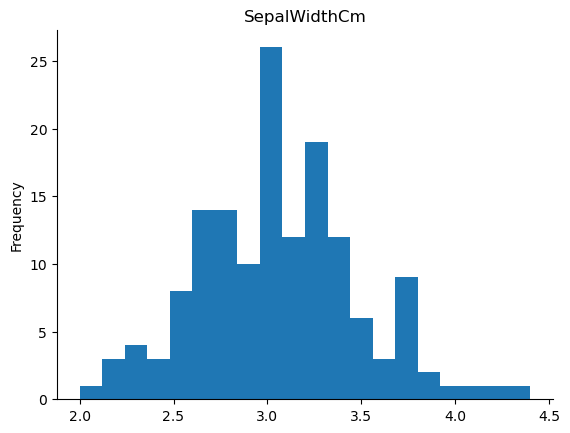

In [40]:
from matplotlib import pyplot as plt

data['SepalWidthCm'].plot(kind='hist', bins=20, title='SepalWidthCm') 
plt.gca().spines[['top', 'right',]].set_visible(False)

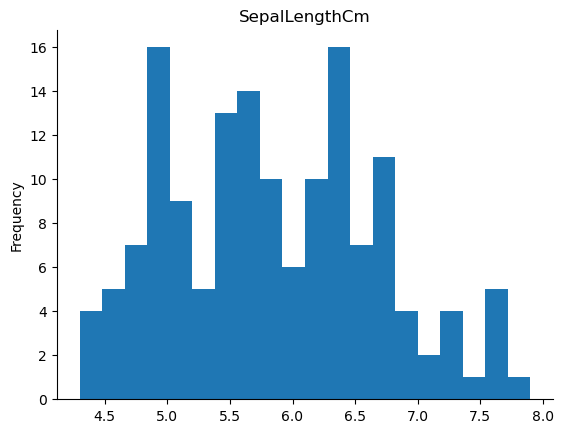

In [41]:
#@title sepal length (cm)
from matplotlib import pyplot as plt
data['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines [['top', 'right',]].set_visible(False)

In [43]:
data["Species"].replace({"Iris-setosa": 1, "Iris-virsicolor": 2, "Iris-virginica":3}, inplace=True)

In [44]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [47]:
x=pd.DataFrame(data,columns=["SepalLengthCm", "SepalwidthCm", "PetalLengthCm", "PetalWidthCm"]).values

In [48]:
x

array([[5.1, nan, 1.4, 0.2],
       [4.9, nan, 1.4, 0.2],
       [4.7, nan, 1.3, 0.2],
       [4.6, nan, 1.5, 0.2],
       [5. , nan, 1.4, 0.2],
       [5.4, nan, 1.7, 0.4],
       [4.6, nan, 1.4, 0.3],
       [5. , nan, 1.5, 0.2],
       [4.4, nan, 1.4, 0.2],
       [4.9, nan, 1.5, 0.1],
       [5.4, nan, 1.5, 0.2],
       [4.8, nan, 1.6, 0.2],
       [4.8, nan, 1.4, 0.1],
       [4.3, nan, 1.1, 0.1],
       [5.8, nan, 1.2, 0.2],
       [5.7, nan, 1.5, 0.4],
       [5.4, nan, 1.3, 0.4],
       [5.1, nan, 1.4, 0.3],
       [5.7, nan, 1.7, 0.3],
       [5.1, nan, 1.5, 0.3],
       [5.4, nan, 1.7, 0.2],
       [5.1, nan, 1.5, 0.4],
       [4.6, nan, 1. , 0.2],
       [5.1, nan, 1.7, 0.5],
       [4.8, nan, 1.9, 0.2],
       [5. , nan, 1.6, 0.2],
       [5. , nan, 1.6, 0.4],
       [5.2, nan, 1.5, 0.2],
       [5.2, nan, 1.4, 0.2],
       [4.7, nan, 1.6, 0.2],
       [4.8, nan, 1.6, 0.2],
       [5.4, nan, 1.5, 0.4],
       [5.2, nan, 1.5, 0.1],
       [5.5, nan, 1.4, 0.2],
       [4.9, n

In [50]:
y=data.Species.values.reshape(-1,1)

In [51]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       [

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [54]:
x_train.shape

(105, 4)

In [55]:
y_train.shape

(105, 1)